<a href="https://colab.research.google.com/github/RPAD676Spring2025/lab-4-Sanjayyellina/blob/main/Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Algorithm 1: Optimal Resource Allocation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def optimal_resource_allocation(resources, needs, distances, max_distance=None):
    """
    Allocate limited resources to locations based on need and accessibility.

    Args:
        resources: Total resources available to distribute
        needs: Array of needs per location (higher = more needed)
        distances: Matrix of distances between locations
        max_distance: Maximum service distance (optional)

    Returns:
        allocations: Array of allocated resources per location
    """
    print("Starting resource allocation algorithm...")
    n_locations = len(needs)

    # Normalize needs to sum to 1
    normalized_needs = needs / np.sum(needs)
    print(f"Normalized needs: min={normalized_needs.min():.4f}, max={normalized_needs.max():.4f}")

    # Calculate accessibility scores
    if max_distance is None:
        max_distance = np.median(distances)
        print(f"Using median distance ({max_distance:.2f}) as max_distance parameter")

    accessibility = np.zeros(n_locations)
    for i in range(n_locations):
        # Create a copy of the distances to avoid modifying the original
        dist_i = distances[i].copy()
        # Set self-distance to a very large number instead of infinity
        dist_i[i] = 9999999  # This avoids the infinity issue
        weight = np.exp(-dist_i / max_distance)
        accessibility[i] = np.sum(weight)

    # Normalize accessibility
    accessibility = accessibility / np.sum(accessibility)
    print(f"Accessibility scores: min={accessibility.min():.4f}, max={accessibility.max():.4f}")

    # Combine needs and accessibility (70% needs, 30% accessibility)
    combined_score = 0.7 * normalized_needs + 0.3 * accessibility
    combined_score = combined_score / np.sum(combined_score)

    # Allocate resources
    allocations = resources * combined_score

    # Round to integers
    allocations = np.round(allocations).astype(int)
    print(f"Initial allocation: {np.sum(allocations)} of {resources} resources")

    # Adjust for rounding errors
    diff = resources - np.sum(allocations)
    if diff > 0:
        # Allocate remaining resources to highest-need locations
        indices = np.argsort(normalized_needs)[::-1]
        for i in range(diff):
            allocations[indices[i % n_locations]] += 1
        print(f"Added {diff} remaining resources to highest-need locations")
    elif diff < 0:
        # Remove from lowest-need locations
        indices = np.argsort(normalized_needs)
        for i in range(abs(diff)):
            if allocations[indices[i % n_locations]] > 0:
                allocations[indices[i % n_locations]] -= 1
        print(f"Removed {abs(diff)} excess resources from lowest-need locations")

    print("Resource allocation complete")
    return allocations



In [4]:
# Create test data for resource allocation
def create_allocation_example():
    print("Creating test data for resource allocation...")
    # Create 3 locations with varying needs
    n_locations = 3

    # Population at each location
    population = np.array([5000, 2000, 12000,])

    # Need score (e.g., poverty rate from 0-1)
    need_scores = np.array([0.3, 0.5, 0.2,])

    # Distance matrix between locations (in miles)
    distances = np.array([
        [0, 10, 15 ],  # Distances from location 0 to all others
        [10, 0, 12],  # Distances from location 1 to all others
        [15, 12, 0,],  # Distances from location 2 to all others
          # Distances from location 3 to all others
           # Distances from location 4 to all others
    ])

    # Total resources to allocate (e.g., $10 million in community development funds)
    total_resources = 100

    print(f"Created data for {n_locations} locations with ${total_resources} to allocate")
    return population, need_scores, distances, total_resources



Creating test data for resource allocation...
Created data for 3 locations with $100 to allocate
Starting resource allocation algorithm...
Normalized needs: min=0.2000, max=0.5000
Using median distance (10.00) as max_distance parameter
Accessibility scores: min=0.2938, max=0.3750
Initial allocation: 100 of 100 resources
Resource allocation complete


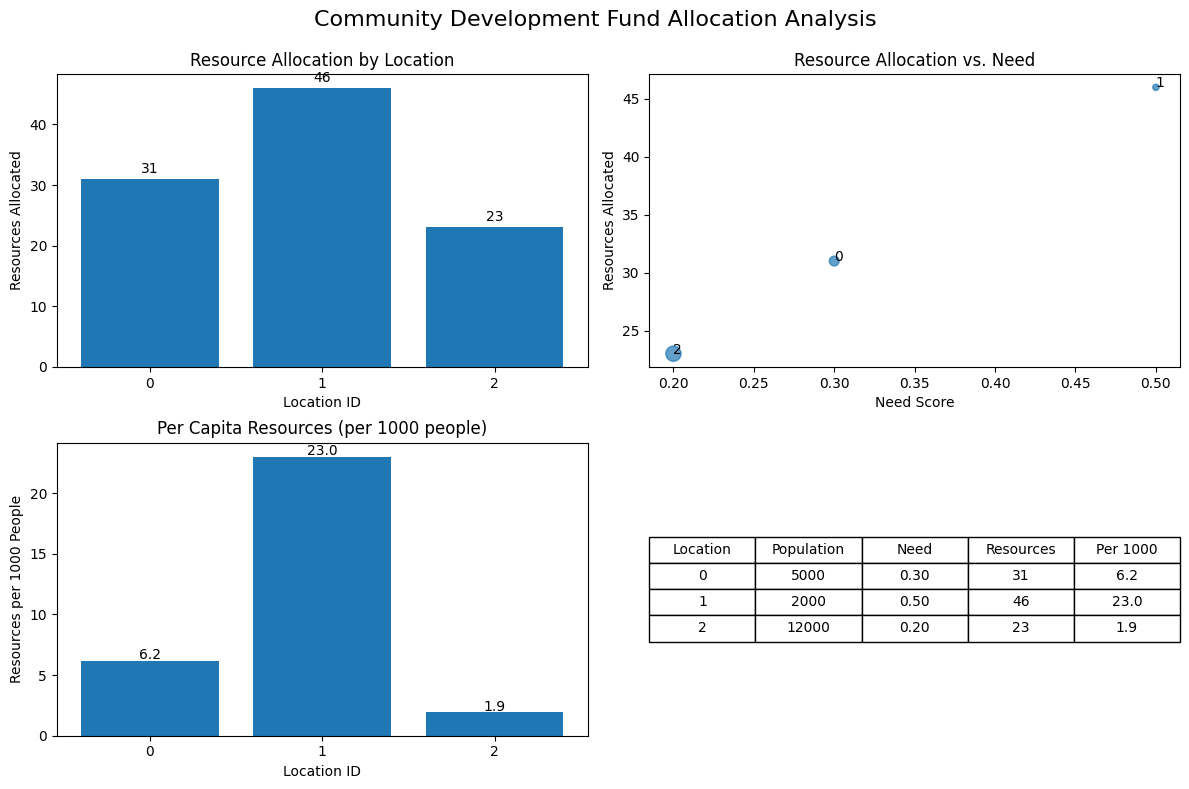


Allocation Summary:
Total Resources Allocated: 100
Correlation with Need Score: 0.9999
Per Capita Range: 1.92 to 23.00


In [5]:
# Run the algorithm and visualize results
def run_allocation_example():
    # Get data
    population, need_scores, distances, total_resources = create_allocation_example()

    # Run allocation algorithm
    allocations = optimal_resource_allocation(total_resources, need_scores, distances)

    # Calculate per capita allocation for analysis
    per_capita = allocations / population * 1000  # Resources per 1000 people

    # Visualize results
    plt.figure(figsize=(12, 8))

    # Plot 1: Allocation by location
    plt.subplot(2, 2, 1)
    plt.bar(range(len(allocations)), allocations)
    plt.title('Resource Allocation by Location')
    plt.xlabel('Location ID')
    plt.ylabel('Resources Allocated')
    plt.xticks(range(len(allocations)))
    for i, v in enumerate(allocations):
        plt.text(i, v+1, str(v), ha='center')

    # Plot 2: Resources vs Need
    plt.subplot(2, 2, 2)
    plt.scatter(need_scores, allocations, s=population/100, alpha=0.7)
    plt.title('Resource Allocation vs. Need')
    plt.xlabel('Need Score')
    plt.ylabel('Resources Allocated')
    for i, txt in enumerate(range(len(allocations))):
        plt.annotate(txt, (need_scores[i], allocations[i]))

    # Plot 3: Per capita resources
    plt.subplot(2, 2, 3)
    plt.bar(range(len(per_capita)), per_capita)
    plt.title('Per Capita Resources (per 1000 people)')
    plt.xlabel('Location ID')
    plt.ylabel('Resources per 1000 People')
    plt.xticks(range(len(per_capita)))
    for i, v in enumerate(per_capita):
        plt.text(i, v+0.1, f"{v:.1f}", ha='center')

    # Plot 4: Table of values
    plt.subplot(2, 2, 4)
    plt.axis('off')
    table_data = [
        ["Location", "Population", "Need", "Resources", "Per 1000"],
    ]
    for i in range(len(allocations)):
        table_data.append([
            f"{i}",
            f"{population[i]}",
            f"{need_scores[i]:.2f}",
            f"{allocations[i]}",
            f"{per_capita[i]:.1f}"
        ])
    table = plt.table(cellText=table_data, loc='center', cellLoc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 1.5)

    plt.tight_layout()
    plt.suptitle('Community Development Fund Allocation Analysis', fontsize=16)
    plt.subplots_adjust(top=0.9)
    plt.show()

    # Print summary statistics
    print("\nAllocation Summary:")
    print(f"Total Resources Allocated: {np.sum(allocations)}")
    print(f"Correlation with Need Score: {np.corrcoef(need_scores, allocations)[0,1]:.4f}")
    print(f"Per Capita Range: {np.min(per_capita):.2f} to {np.max(per_capita):.2f}")

    return allocations, population, need_scores

# Run the example
if __name__ == "__main__":
    allocations, population, need_scores = run_allocation_example()

by using 3 locations ,fairness should be improved . the resouces distrubution is not fair . better to use
 4 or more locations

## Algorithm 2: Service Center Location Optimization

In [31]:
import numpy as np
import matplotlib.pyplot as plt

def clustering_based_service_locations(coordinates, num_centers, population_weights=None):
    """
    Find optimal service center locations using weighted k-means clustering.

    Args:
        coordinates: Array of coordinates for population points
        num_centers: Number of service centers to place
        population_weights: Weights for each coordinate

    Returns:
        center_locations: Coordinates of the recommended service centers
        assignments: Assigned center for each input coordinate
    """
    print("Starting service location clustering algorithm...")
    n_points = coordinates.shape[0]

    # If no weights provided, use equal weights
    if population_weights is None:
        print("No population weights provided. Using equal weights.")
        population_weights = np.ones(n_points)
    else:
        print(f"Using population weights (min={min(population_weights):.1f}, max={max(population_weights):.1f})")

    # Normalize weights
    weights = population_weights / np.sum(population_weights)

    # Initialize centers randomly
    np.random.seed(35)  # For reproducibility
    idx = np.random.choice(n_points, num_centers, replace=False)
    centers = coordinates[idx].copy()
    print(f"Initialized {num_centers} random center locations")

    # K-means iterations
    max_iterations = 100
    tolerance = 1e-4

    for iteration in range(max_iterations):
        # Calculate distances to centers
        distances = np.zeros((n_points, num_centers))
        for i in range(num_centers):
            distances[:, i] = np.sum((coordinates - centers[i])**2, axis=1)

        # Assign points to nearest center
        assignments = np.argmin(distances, axis=1)

        # Update centers
        new_centers = np.zeros_like(centers)
        for i in range(num_centers):
            mask = (assignments == i)
            if np.sum(mask) > 0:
                # Weighted average of points
                new_centers[i] = np.average(
                    coordinates[mask],
                    axis=0,
                    weights=weights[mask]
                )

        # Check convergence
        center_shift = np.sum((centers - new_centers)**2)
        centers = new_centers

        if center_shift < tolerance:
            print(f"Converged after {iteration+1} iterations")
            break

    print("Service center location optimization complete")
    return centers, assignments



In [32]:
# Create test data for service center placement
def create_clustering_example():
    print("Creating test data for service center placement...")
    # Set random seed for reproducibility
    np.random.seed(35)

    # Create three clusters of population points
    n_points = 100

    # Cluster 1: Dense urban area
    urban_x = np.random.normal(25, 5, size=50)
    urban_y = np.random.normal(25, 5, size=50)
    #urban_pop = np.random.normal(1000, 200, size=50)  # Higher population

    # Cluster 2: Suburban area
    suburban_x = np.random.normal(75, 10, size=30)
    suburban_y = np.random.normal(50, 10, size=30)
    #suburban_pop = np.random.normal(500, 100, size=30)  # Medium population

    # Cluster 3: Rural area
    rural_x = np.random.normal(40, 15, size=20)
    rural_y = np.random.normal(75, 15, size=20)
    #rural_pop = np.random.normal(200, 50, size=20)  # Lower population

    # Combine into single arrays
    x_coords = np.concatenate([urban_x, suburban_x, rural_x])
    y_coords = np.concatenate([urban_y, suburban_y, rural_y])
   # population = np.concatenate([urban_pop, suburban_pop, rural_pop])

    # Create coordinates array
    coordinates = np.column_stack([x_coords, y_coords])

    # Number of service centers to place
    num_centers = 3

    print(f"Created {len(coordinates)} population points and will place {num_centers} centers")
    return coordinates, population, num_centers



Creating test data for service center placement...
Created 100 population points and will place 3 centers
Starting service location clustering algorithm...
Using population weights (min=125.3, max=1448.8)
Initialized 3 random center locations
Converged after 3 iterations
Service center location optimization complete

Service Center Statistics:
Center | Population Served | # of Locations | Avg Distance
-------|-------------------|----------------|-------------
      0 |             51233 |               51 |        6.90
      1 |             15450 |               33 |       13.95
      2 |              3307 |               16 |       16.07


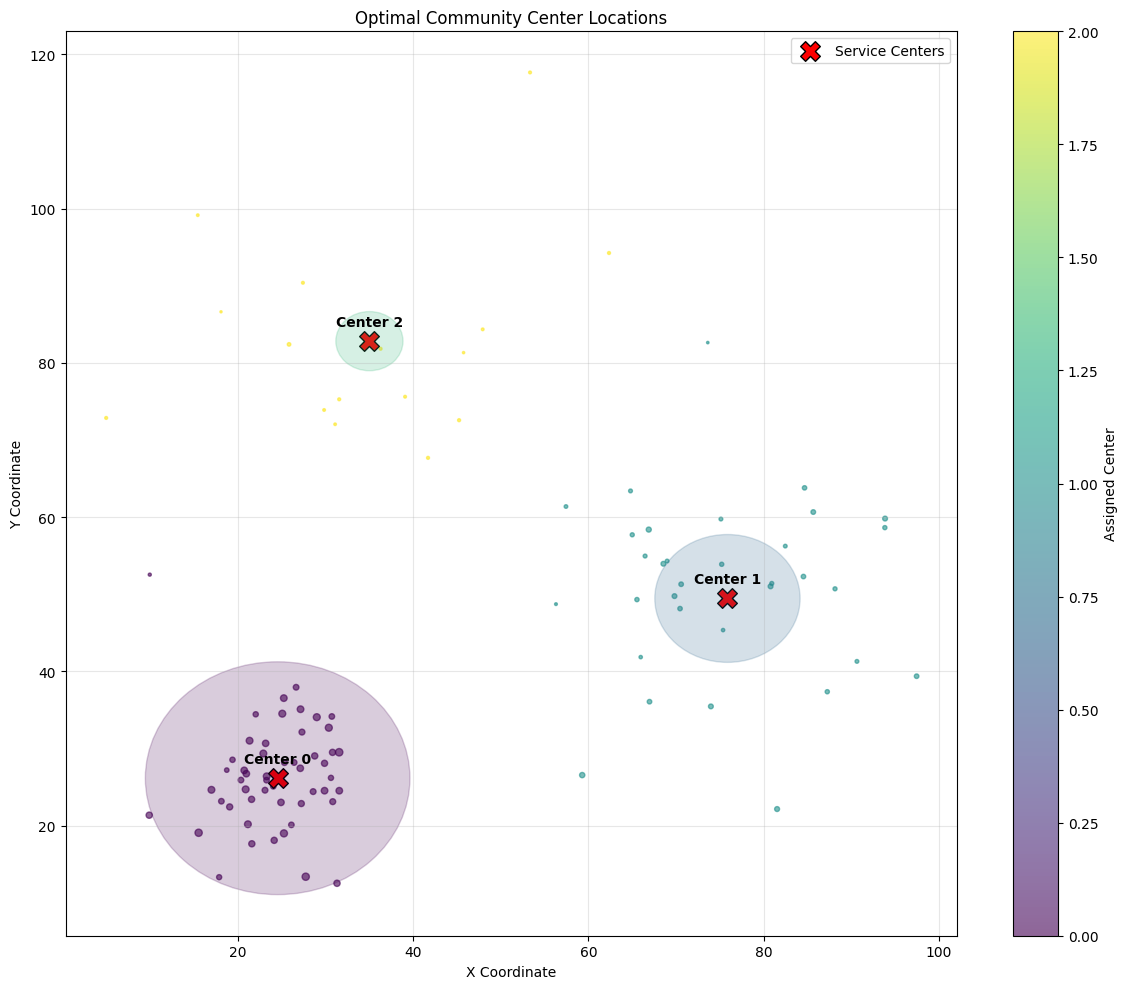

In [33]:
# Run the algorithm and visualize results
def run_clustering_example():
    # Get data
    coordinates, population, num_centers = create_clustering_example()

    # Run clustering algorithm
    centers, assignments = clustering_based_service_locations(coordinates, num_centers, population)

    # Visualize the results
    plt.figure(figsize=(12, 10))

    # Plot population points, sized by population and colored by assigned center
    scatter = plt.scatter(
        coordinates[:, 0], coordinates[:, 1],
        s=population/50,  # Size by population
        c=assignments,    # Color by assignment
        cmap='viridis',
        alpha=0.6
    )

    # Plot service centers
    plt.scatter(
        centers[:, 0], centers[:, 1],
        s=200,
        c='red',
        marker='X',
        edgecolors='black',
        label='Service Centers'
    )

    # Add center labels
    for i, (x, y) in enumerate(centers):
        plt.text(x, y+2, f'Center {i}', ha='center', fontweight='bold')

    # Add a visual representation of population served
    for i in range(num_centers):
        mask = (assignments == i)
        pop_served = np.sum(population[mask])
        # Draw a circle proportional to population served
        pop_radius = np.sqrt(pop_served) / 15
        circle = plt.Circle(
            (centers[i, 0], centers[i, 1]),
            pop_radius,
            color=plt.cm.viridis(i/num_centers),
            alpha=0.2
        )
        plt.gca().add_patch(circle)

    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Optimal Community Center Locations')
    plt.grid(True, alpha=0.3)
    plt.colorbar(scatter, label='Assigned Center')
    plt.legend()

    # Print statistics for each center
    print("\nService Center Statistics:")
    print("Center | Population Served | # of Locations | Avg Distance")
    print("-------|-------------------|----------------|-------------")

    for i in range(num_centers):
        mask = (assignments == i)
        locations_served = np.sum(mask)
        pop_served = np.sum(population[mask])

        # Calculate average distance to center
        if locations_served > 0:
            center_dists = np.sqrt(np.sum((coordinates[mask] - centers[i])**2, axis=1))
            avg_dist = np.average(center_dists, weights=population[mask])
        else:
            avg_dist = 0

        print(f"{i:7d} | {pop_served:17.0f} | {locations_served:16d} | {avg_dist:11.2f}")

    plt.tight_layout()
    plt.show()

    return centers, assignments, coordinates, population

# Run the example
if __name__ == "__main__":
    centers, assignments, coordinates, population = run_clustering_example()

Reducing to 3 centers led to uneven population distribution( and also checked by removing population weight) . Center 0 serves 50,979 people, making it overburdened, while Centers 1 and 2 serve fewer people with higher travel distances.for better efficiency and service quality we need to increase centers. i changed the no.of centers to 6 and 7 .After  6 centers the values start to diminish



## Algorithm 3: Equity-Adjusted Program Access

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def equity_adjusted_scoring(scores, demographic_groups, adjustment_factor=0.1):
    """
    Adjust scores to reduce demographic disparities while maintaining ranking integrity.

    Args:
        scores: Original merit-based scores (higher is better)
        demographic_groups: Group indicator for each score (categorical)
        adjustment_factor: Strength of the adjustment (0 = no change, 1 = full equalization)

    Returns:
        adjusted_scores: Scores adjusted to reduce demographic disparities
        group_means: Mean scores by group before and after adjustment
    """
    print("Starting equity adjustment algorithm...")
    print(f"Adjustment factor: {adjustment_factor}")

    # Calculate global mean
    global_mean = np.mean(scores)
    print(f"Global mean score: {global_mean:.2f}")

    # Calculate group means
    unique_groups = np.unique(demographic_groups)
    group_means = {}

    print("Original group statistics:")
    for group in unique_groups:
        mask = (demographic_groups == group)
        group_mean = np.mean(scores[mask])
        group_count = np.sum(mask)
        group_means[group] = {
            'original_mean': group_mean,
            'count': group_count
        }
        print(f"  Group {group}: mean={group_mean:.2f}, count={group_count}")

    # Calculate adjustments
    print("Calculating adjustments...")
    adjustments = np.zeros_like(scores)
    for group in unique_groups:
        mask = (demographic_groups == group)
        group_diff = global_mean - group_means[group]['original_mean']
        adjustments[mask] = group_diff * adjustment_factor
        print(f"  Group {group}: adjustment={group_diff * adjustment_factor:.2f}")

    # Apply adjustments
    adjusted_scores = scores + adjustments

    # Calculate new group means
    print("Adjusted group statistics:")
    for group in unique_groups:
        mask = (demographic_groups == group)
        adjusted_mean = np.mean(adjusted_scores[mask])
        group_means[group]['adjusted_mean'] = adjusted_mean
        print(f"  Group {group}: adjusted mean={adjusted_mean:.2f}")

    # Calculate disparity reduction
    original_disparity = max([group_means[g]['original_mean'] for g in unique_groups]) - \
                        min([group_means[g]['original_mean'] for g in unique_groups])

    adjusted_disparity = max([group_means[g]['adjusted_mean'] for g in unique_groups]) - \
                        min([group_means[g]['adjusted_mean'] for g in unique_groups])

    disparity_reduction = (original_disparity - adjusted_disparity) / original_disparity * 100
    print(f"Disparity reduction: {disparity_reduction:.1f}%")

    print("Equity adjustment complete")
    return adjusted_scores, group_means



In [17]:
# Create test data for equity adjustment
def create_equity_example():
    print("Creating test data for equity adjustment...")
    # Set random seed for reproducibility
    np.random.seed(35)

    # Create three demographic groups with different score distributions
    n_applicants = 300

    # Group A: Higher average scores
    group_a_scores = np.random.normal(180, 10, size=100)
    group_a_labels = np.array(['A'] * 100)

    # Group B: Medium average scores
    group_b_scores = np.random.normal(70, 10, size=100)
    group_b_labels = np.array(['B'] * 100)

    # Group C: Lower average scores
    group_c_scores = np.random.normal(100, 10, size=100)
    group_c_labels = np.array(['C'] * 100)

    # Combine into single arrays
    all_scores = np.concatenate([group_a_scores, group_b_scores, group_c_scores])
    all_groups = np.concatenate([group_a_labels, group_b_labels, group_c_labels])

    # Adjustment factor
    adjustment_factor = 0.7  # Start with medium adjustment

    print(f"Created {len(all_scores)} applicants from {len(np.unique(all_groups))} demographic groups")
    return all_scores, all_groups, adjustment_factor



Creating test data for equity adjustment...
Created 300 applicants from 3 demographic groups
Starting equity adjustment algorithm...
Adjustment factor: 0.7
Global mean score: 116.82
Original group statistics:
  Group A: mean=180.58, count=100
  Group B: mean=70.53, count=100
  Group C: mean=99.36, count=100
Calculating adjustments...
  Group A: adjustment=-44.63
  Group B: adjustment=32.40
  Group C: adjustment=12.22
Adjusted group statistics:
  Group A: adjusted mean=135.95
  Group B: adjusted mean=102.94
  Group C: adjusted mean=111.59
Disparity reduction: 70.0%
Equity adjustment complete


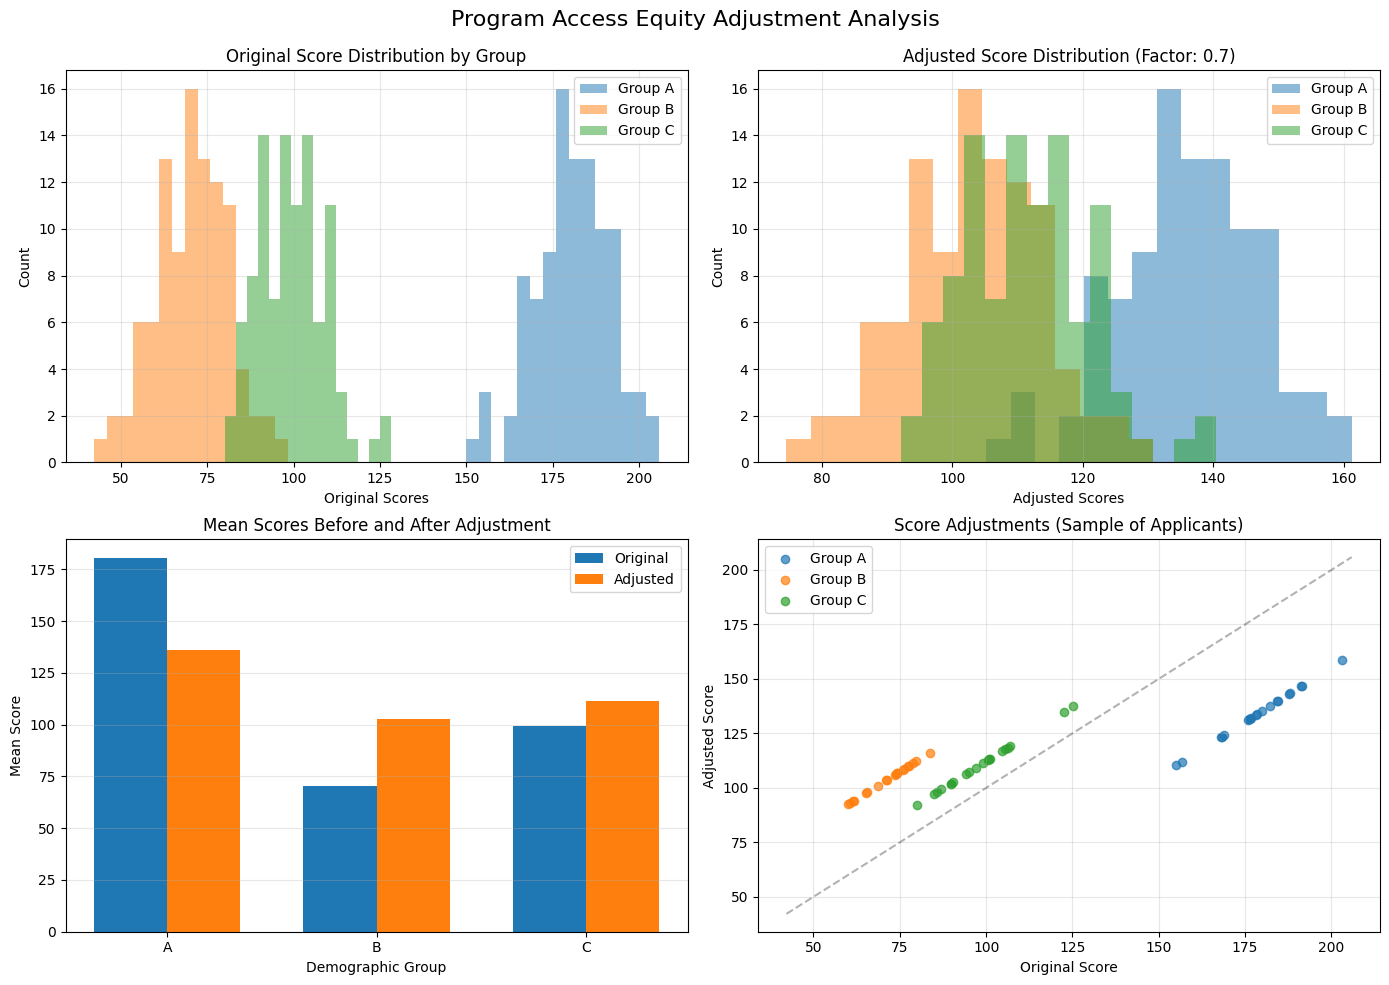


Program Access Analysis (Top 30% selected):
Original score threshold: 108.02
Adjusted score threshold: 125.64

Group representation in program:
Group | Original % | Adjusted % | Change
------|------------|------------|-------
A      |      100.0% |       84.0% |  -16.0%
B      |        0.0% |        1.0% |   +1.0%
C      |       20.0% |        5.0% |  -15.0%


In [19]:
# Run the algorithm and visualize results
def run_equity_example():
    # Get data
    scores, demographic_groups, adjustment_factor = create_equity_example()

    # Run equity adjustment algorithm
    adjusted_scores, group_means = equity_adjusted_scoring(scores, demographic_groups, adjustment_factor)

    # Visualize the results
    plt.figure(figsize=(14, 10))

    # Plot 1: Original score distributions by group
    plt.subplot(2, 2, 1)
    groups = np.unique(demographic_groups)
    for group in groups:
        mask = (demographic_groups == group)
        plt.hist(scores[mask], alpha=0.5, bins=15, label=f'Group {group}')

    plt.xlabel('Original Scores')
    plt.ylabel('Count')
    plt.title('Original Score Distribution by Group')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Plot 2: Adjusted score distributions by group
    plt.subplot(2, 2, 2)
    for group in groups:
        mask = (demographic_groups == group)
        plt.hist(adjusted_scores[mask], alpha=0.5, bins=15, label=f'Group {group}')

    plt.xlabel('Adjusted Scores')
    plt.ylabel('Count')
    plt.title(f'Adjusted Score Distribution (Factor: {adjustment_factor})')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Plot 3: Group means before and after
    plt.subplot(2, 2, 3)
    group_list = list(groups)
    x = np.arange(len(group_list))
    width = 0.35

    original_means = [group_means[g]['original_mean'] for g in group_list]
    adjusted_means = [group_means[g]['adjusted_mean'] for g in group_list]

    plt.bar(x - width/2, original_means, width, label='Original')
    plt.bar(x + width/2, adjusted_means, width, label='Adjusted')

    plt.xlabel('Demographic Group')
    plt.ylabel('Mean Score')
    plt.title('Mean Scores Before and After Adjustment')
    plt.xticks(x, group_list)
    plt.legend()
    plt.grid(True, alpha=0.3, axis='y')

    # Plot 4: Score changes for a sample of applicants
    plt.subplot(2, 2, 4)

    # Select 20 random applicants from each group for clarity
    sampled_indices = []
    for group in groups:
        mask = (demographic_groups == group)
        indices = np.where(mask)[0]
        if len(indices) > 20:
            indices = np.random.choice(indices, 20, replace=False)
        sampled_indices.extend(indices)

    sampled_indices = np.array(sampled_indices)

    # Create scatter plot of original vs adjusted scores
    for group in groups:
        mask = (demographic_groups[sampled_indices] == group)
        plt.scatter(
            scores[sampled_indices][mask],
            adjusted_scores[sampled_indices][mask],
            alpha=0.7,
            label=f'Group {group}'
        )

    # Add the y=x line
    min_score = min(np.min(scores), np.min(adjusted_scores))
    max_score = max(np.max(scores), np.max(adjusted_scores))
    plt.plot([min_score, max_score], [min_score, max_score], 'k--', alpha=0.3)

    plt.xlabel('Original Score')
    plt.ylabel('Adjusted Score')
    plt.title('Score Adjustments (Sample of Applicants)')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.suptitle('Program Access Equity Adjustment Analysis', fontsize=16)
    plt.subplots_adjust(top=0.92)
    plt.show()

    # Calculate and print additional metrics
    threshold = np.percentile(scores, 60)  # Top 30% get into program
    adjusted_threshold = np.percentile(adjusted_scores, 70)

    print("\nProgram Access Analysis (Top 30% selected):")
    print(f"Original score threshold: {threshold:.2f}")
    print(f"Adjusted score threshold: {adjusted_threshold:.2f}")

    print("\nGroup representation in program:")
    print("Group | Original % | Adjusted % | Change")
    print("------|------------|------------|-------")

    for group in groups:
        mask = (demographic_groups == group)
        original_selected = np.sum((scores[mask] >= threshold)) / np.sum(mask) * 100
        adjusted_selected = np.sum((adjusted_scores[mask] >= adjusted_threshold)) / np.sum(mask) * 100
        change = adjusted_selected - original_selected

        print(f"{group:6s} | {original_selected:10.1f}% | {adjusted_selected:10.1f}% | {change:+6.1f}%")

    return adjusted_scores, scores, demographic_groups, group_means

# Run the example
if __name__ == "__main__":
    adjusted_scores, original_scores, groups, group_means = run_equity_example()

overall impact of the equity adjustment is consistent.i have changed the adjusted score and no. of group applications and threshold from 70 to 60
